In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt,pretty_bn

from IPython.display import display, Math, Latex

# Exercice 6
> From Roland Donat

L'objectif de cet exercice est de comparer l'influence du choix de la structure d'un RB sur la représentativité de données observées.

Pour ce faire, nous nous intéresserons à des données de retour marketing sur la vente de livret A. Dans ces données, les individus sont décrits par les variables suivantes :

    (A)ge : classe d'âges de l'individu - valeurs possibles : [18,25], [26,59], 60+;
    (E)pargne : l'individu a t-il de l'épargne - valeurs possibles : non, oui;
    (V)ente_livret_A : vente d'un livret A à l'individu - valeurs possibles : échec, succès.



## Modèle 1 : $A \rightarrow V \leftarrow E$

Construire un modèle pour le BN.

In [6]:
bn1 = gum.BayesNet()
a1 = bn1.add("Age",3) # creation d'une V.A. à trois modalités
v1 = bn1.add("Vente",2)
e1 = bn1.add("Epargne",2)
bn1.addArc(a1,v1)
bn1.addArc(e1,v1)
gnb.showBN(bn1)


Lancer l'apprentissage des paramètres sur le fichier "livretA_10000.csv". Indiquer les distributions a priori que propose cette apprentissage.

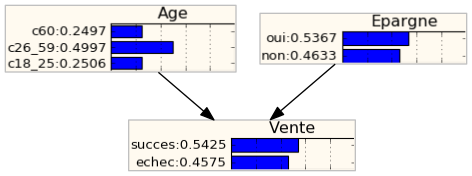

In [8]:
learner = gum.BNLearner("livretA_10000.csv")
learn1 = learner.learnParameters(bn1)
gnb.showInference(learn1)

## Modèle 2 : $A \leftarrow V \rightarrow E$

Même question que précédemment

In [10]:
bn2 = gum.BayesNet()
a2 = bn2.add("Age",3) # creation d'une V.A. à trois modalités
v2 = bn2.add("Vente",2)
e2 = bn2.add("Epargne",2)
bn2.addArc(v2,a2)
bn2.addArc(v2,e2)
gnb.showBN(bn2)

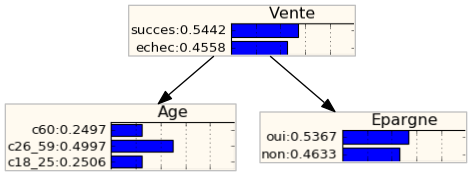

In [11]:
learner = gum.BNLearner("livretA_10000.csv")
learn2 = learner.learnParameters(bn2)
gnb.showInference(learn2)

## Comparaison des 2 modèles

inference 1er modélé sachant Age=1


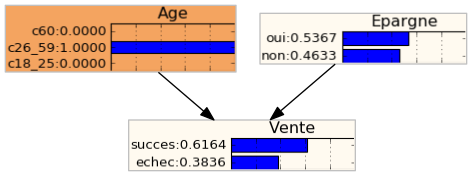

inference 2nd modélé sachant Age=1


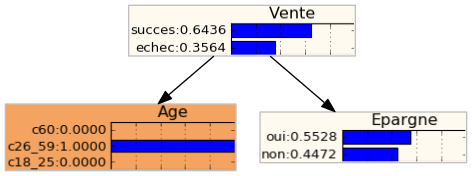

In [13]:
print("inference 1er modéle sachant Age=1")
gnb.showInference(learn1,evs={"Age":1})
print("inference 2nd modéle sachant Age=1")
gnb.showInference(learn2,evs={"Age":1})

### Quel est le "meilleur" modèle ?

Utiliser la log-vraisemblance pour comparer les 2 modèles
$$ll=\sum_{d \in Base} \log P(d)=\sum_{d \in Base}\ \sum_{v \in BN} \log P(v_d | parents_d(v))$$